In [1]:
#Problem Description: 
# On analysing the dataset, the problem I am tackling here is of classification.
# The main aim is to predict whether an individual will be placed or not in the campus recruitment drive. 

In [2]:
#importing necessary libraries
import numpy as np, pandas as pd,seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#importing dataset
df = pd.read_csv('placement.csv')
df.drop('sl_no',inplace=True,axis=1)
#taking an idea of dataset
df.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [4]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
#Since the null values exist only in salary column and that too is relevant to us (since null value here represents not placed), we fill them by 0

In [7]:
df['salary'] = df['salary'].fillna(0)
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

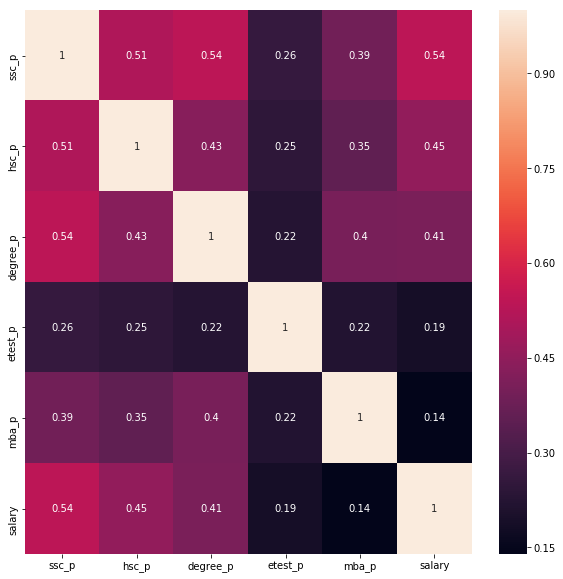

In [8]:
#Plotting the data: 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

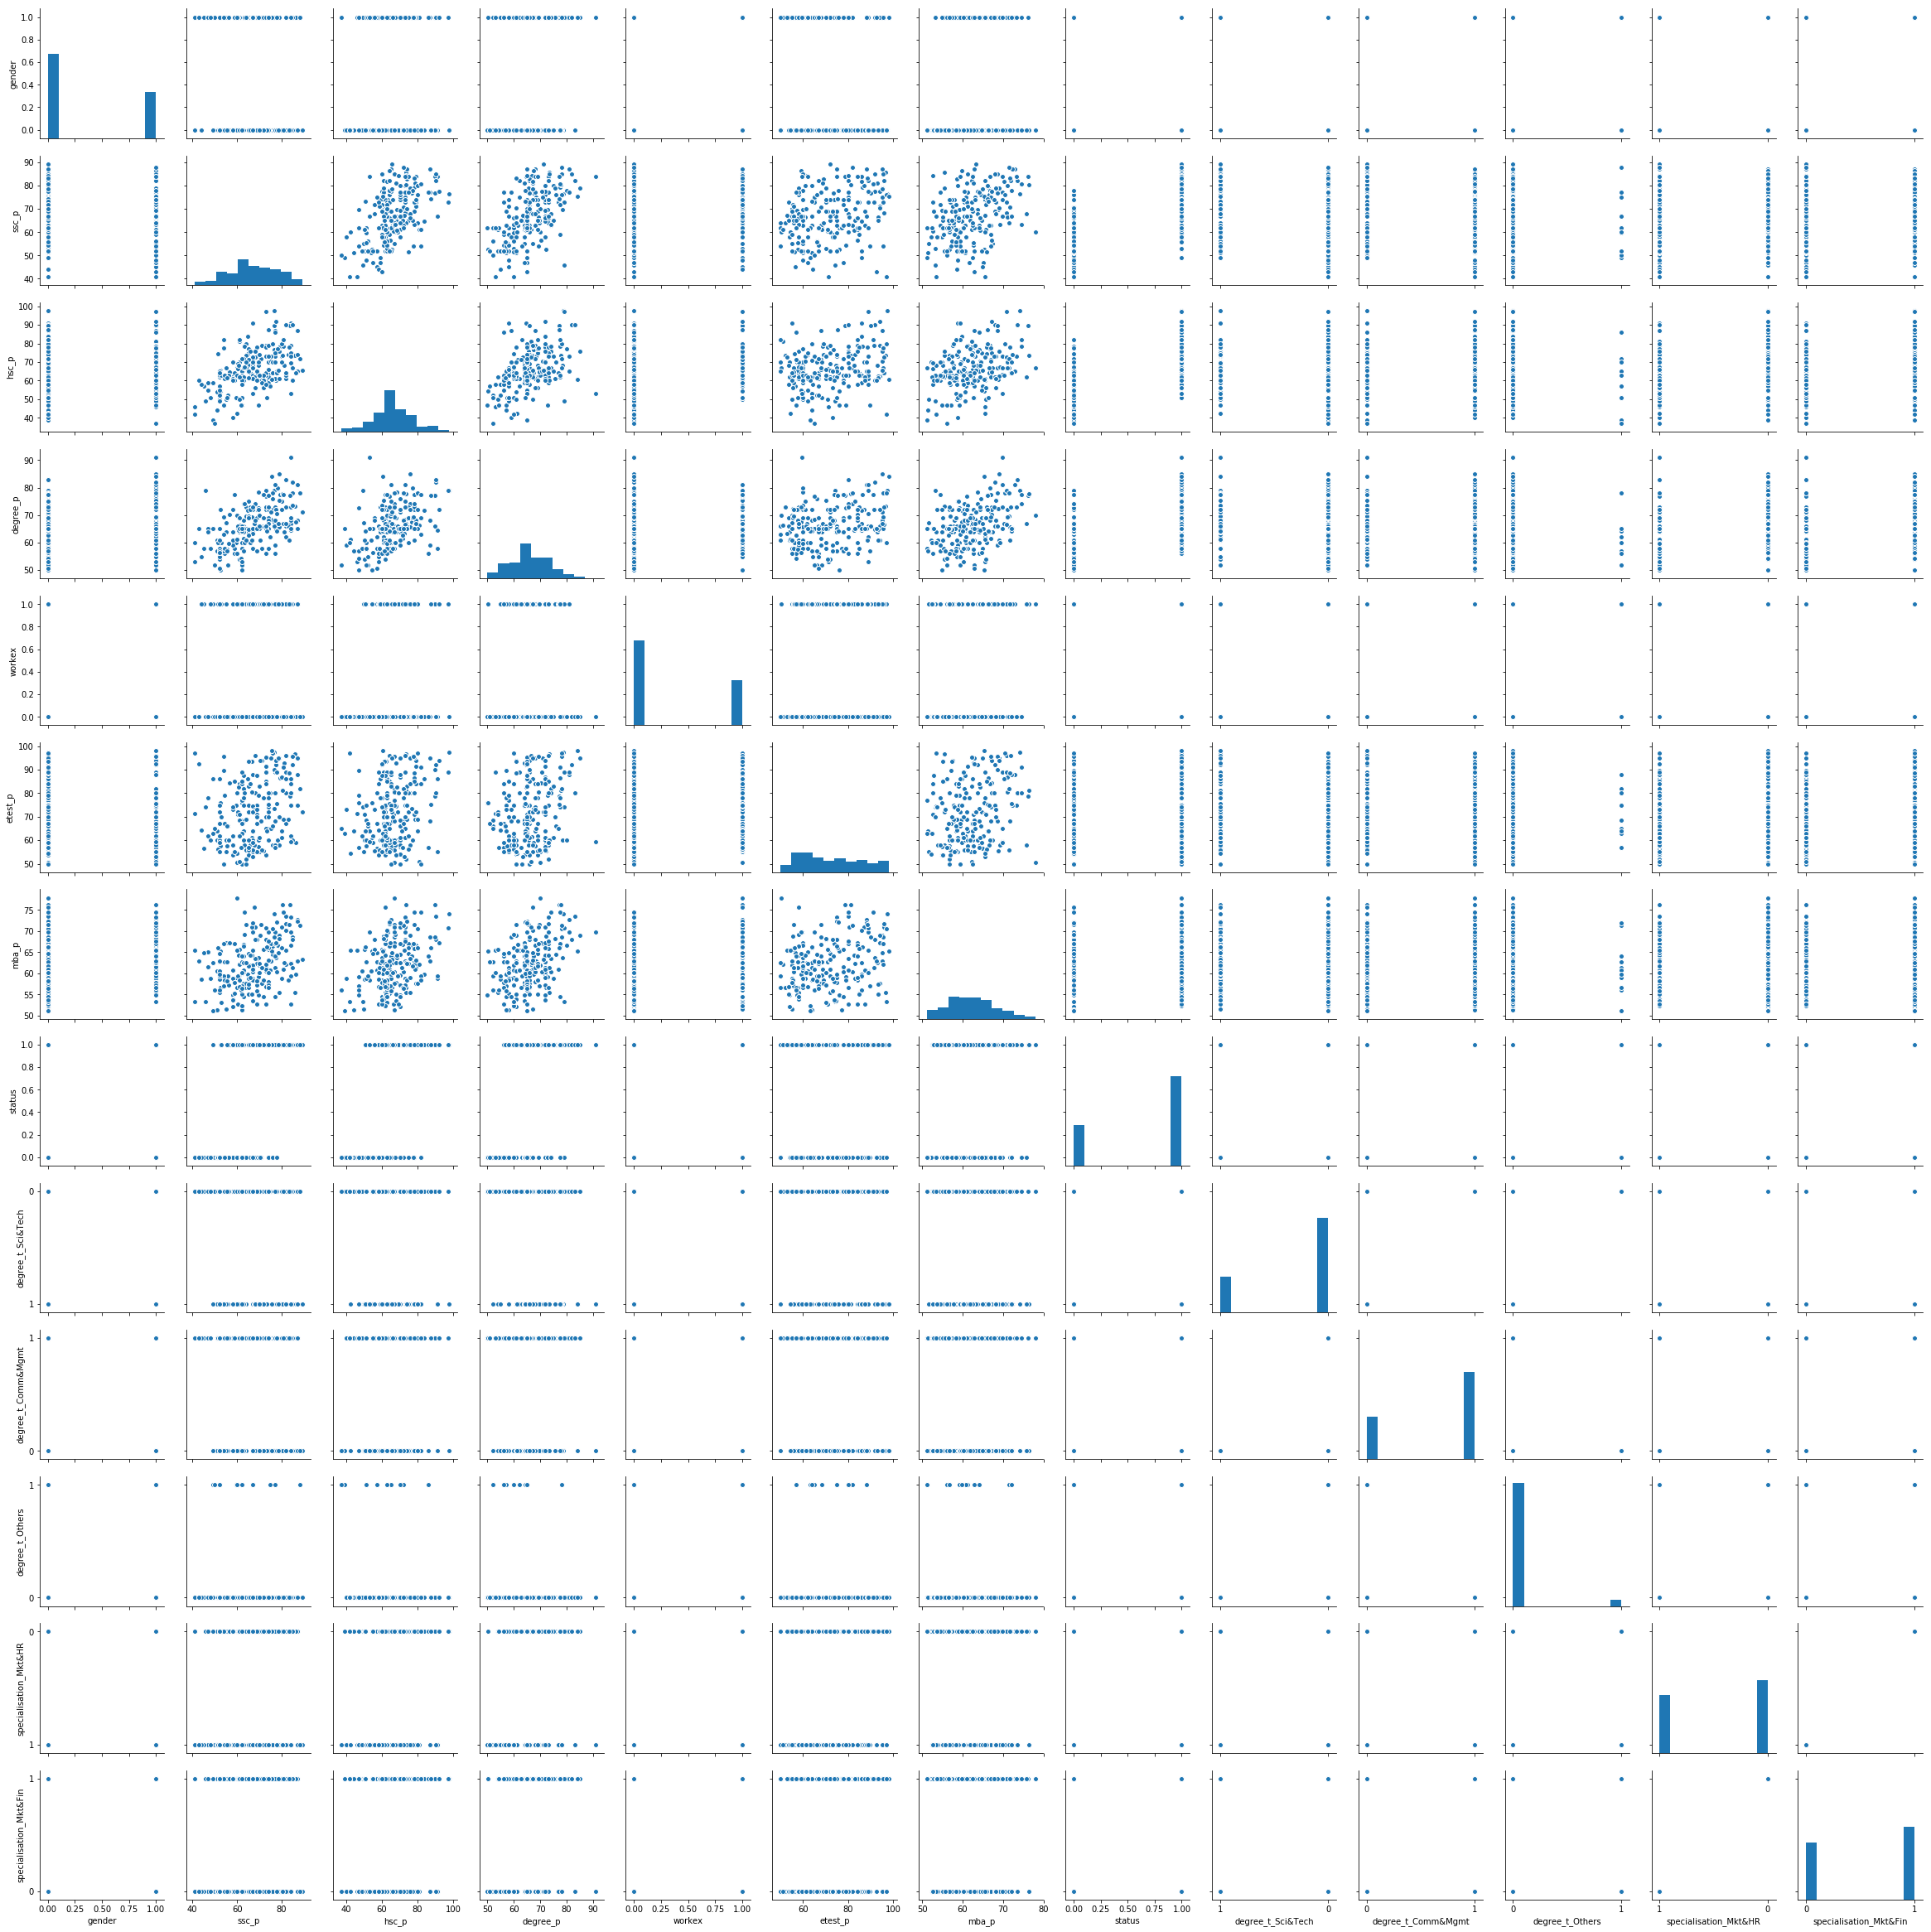

In [44]:
#Pair-plots
sns.pairplot(df,diag_kind = 'hist',kind = 'scatter',palette = 'BrBG')

In [9]:
df= df.drop(columns=['hsc_b','ssc_b','salary'])
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [10]:
#Feature Engineering

new_df = df.select_dtypes(include=[object])
new_df.head()


,gender,hsc_s,degree_t,workex,specialisation,status
0,M,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [11]:
# unique values in each columns
for x in new_df.columns:
    #prinfting unique values
    print(x ,':', len(new_df[x].unique()))

gender : 2
hsc_s : 3
degree_t : 3
workex : 2
specialisation : 2
status : 2


In [12]:
#Encoding categorical data
df['gender'].replace('M',0,inplace=True)
df['gender'].replace('F',1,inplace=True)

df['workex'].replace('No',0,inplace=True)
df['workex'].replace('Yes',1,inplace=True)

df['status'].replace('Not Placed',0,inplace=True)
df['status'].replace('Placed',1,inplace=True)


df['degree_t_Sci&Tech']=df['degree_t'].replace('Comm&Mgmt','0').replace('Others','0').replace('Sci&Tech','1')
df['degree_t_Comm&Mgmt']=df['degree_t'].replace('Sci&Tech','0').replace('Others','0').replace('Comm&Mgmt','1')
df['degree_t_Others']=df['degree_t'].replace('Sci&Tech','0').replace('Comm&Mgmt','0').replace('Others','1')


df['specialisation_Mkt&HR']=df['specialisation'].replace('Mkt&Fin','0').replace('Mkt&HR','1')
df['specialisation_Mkt&Fin']=df['specialisation'].replace('Mkt&HR','0').replace('Mkt&Fin','1')

In [13]:
df= df.drop(columns=['hsc_s','degree_t','specialisation'])
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,degree_t_Sci&Tech,degree_t_Comm&Mgmt,degree_t_Others,specialisation_Mkt&HR,specialisation_Mkt&Fin
0,0,67.00,91.00,58.00,0,55.0,58.80,1,1,0,0,1,0
1,0,79.33,78.33,77.48,1,86.5,66.28,1,1,0,0,0,1
2,0,65.00,68.00,64.00,0,75.0,57.80,1,0,1,0,0,1
3,0,56.00,52.00,52.00,0,66.0,59.43,0,1,0,0,1,0
4,0,85.80,73.60,73.30,0,96.8,55.50,1,0,1,0,0,1


In [14]:
#Model Implementation
x = df.drop('status', axis=1)
y = df['status']
#Since here we predict whether an individual is placed or not

In [15]:
#Test-train split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.4)

In [16]:
#K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
pred=model.predict(x_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)*100

81.3953488372093

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
pred1 = model1.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred1, y_test)*100

89.53488372093024

In [21]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
pred2=model2.predict(x_test)
accuracy_score(pred2, y_test)*100

86.04651162790698

In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
pred3 = model3.predict(x_test)
accuracy_score(pred3, y_test)*100

74.4186046511628

In [25]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train,y_train)

GaussianNB(priors=None)

In [26]:
pred4= model4.predict(x_test)
accuracy_score(pred4, y_test)*100

83.72093023255815

In [27]:
# So, here we have applied KNN, Logistic regression, Random forest, Decision Tree and Naive Bayes models and obtained there accuracy scores.

In [28]:
#Hyperparameter Tuning

In [29]:
#Logistic Regression
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty' : ['l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
clf.fit(x_train,y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8527131782945736
